In [11]:
from data_loader.rectangles import RectanglesDataLoader
from model import feature_extractor
from model import descriptor
from model import decoder
from torch.optim import Adam
from model import vasf
import torch
from trainer import trainer
import random 
dev = torch.device('cuda')

In [3]:
from utils.utils import positionalencoding1d

In [4]:
train_dl = RectanglesDataLoader((32,32),(0,2),(4,10), 128, 1)

In [5]:
m1 = feature_extractor.CNNFeatureExtractor(64)
m2 = descriptor.AutoregressiveMaskedDescriptor(64, 64, 64)
m3 = decoder.ImageGenerator(64, 64)
vasf_model = vasf.Vasf(m1, m2, m3).float()

In [6]:
from utils.utils import count_parameters
count_parameters(vasf_model)

663876

In [7]:
optim = torch.optim.Adam(vasf_model.parameters(), lr=3e-5)

In [8]:
#my_trainer = trainer.SimpleTrainer(train_dl, train_dl, vasf_model, optim, dev)
my_trainer = trainer.SimpleTrainer(train_dl, train_dl, vasf_model, optim, dev)

0it [00:00, ?it/s]

iteration 500 avg loss: 0.0144
correct photo:


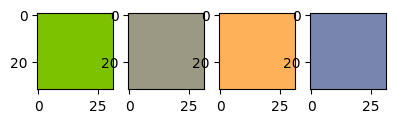

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.0051


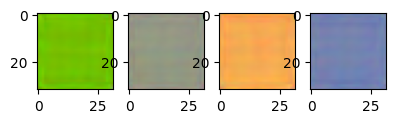

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.0046


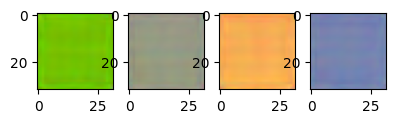

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.004


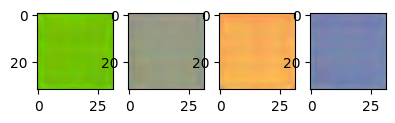

iteration 1000 avg loss: 0.0016
correct photo:


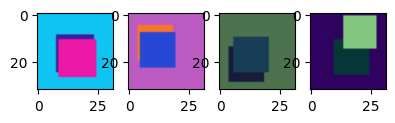

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.2058


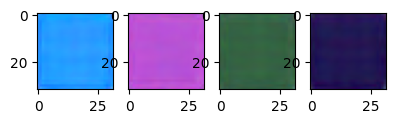

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.209


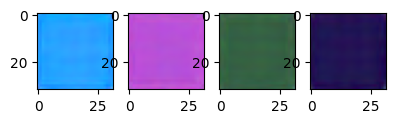

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.2076


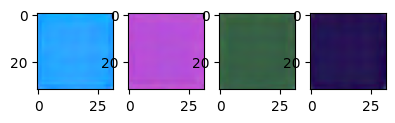

iteration 1500 avg loss: 0.001
correct photo:


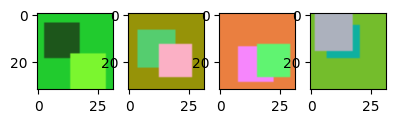

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.2117


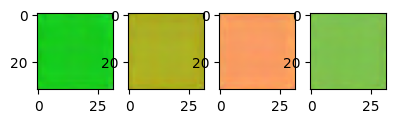

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.2148


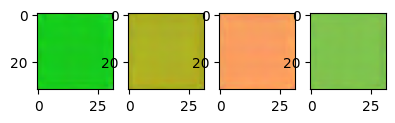

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.2137


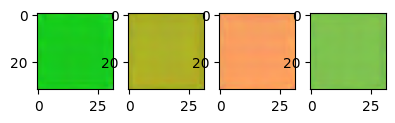

iteration 2000 avg loss: 0.0008
correct photo:


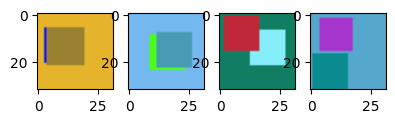

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.2135


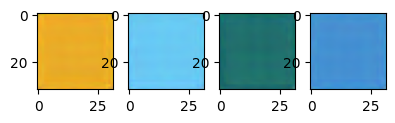

reconstructed by two tokens, mse: 0.2165


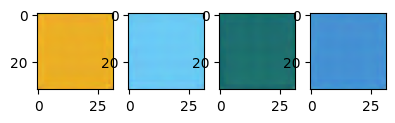

reconstructed by three tokens, , mse: 0.2156


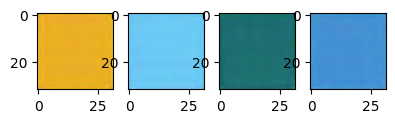

iteration 2500 avg loss: 0.0006
correct photo:


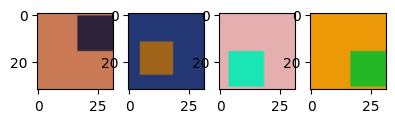

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.1393


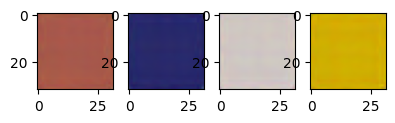

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.1411


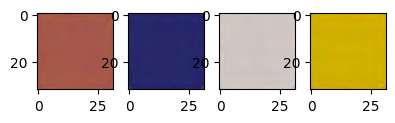

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.1405


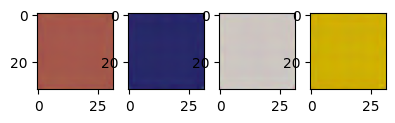

iteration 3000 avg loss: 0.0005
correct photo:


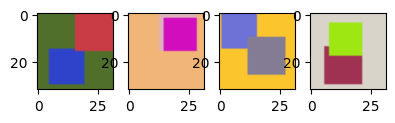

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.2147


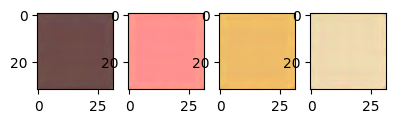

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.217


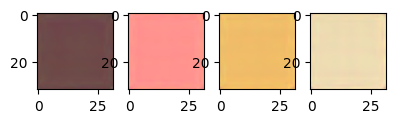

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.2163


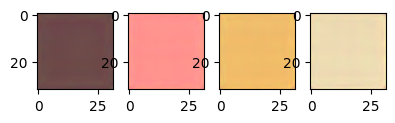

iteration 3500 avg loss: 0.0004
correct photo:


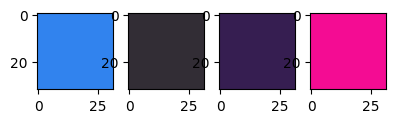

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.0004


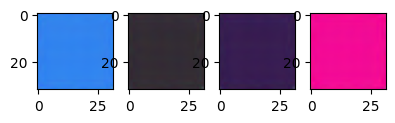

reconstructed by two tokens, mse: 0.0003


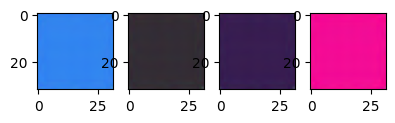

reconstructed by three tokens, , mse: 0.0003


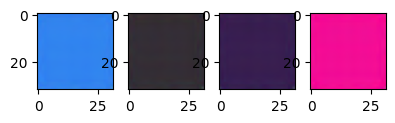

iteration 4000 avg loss: 0.0003
correct photo:


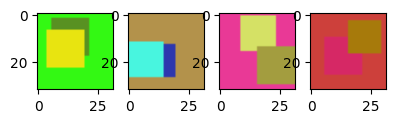

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by one token, mse: 0.1952


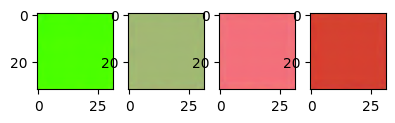

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by two tokens, mse: 0.1966


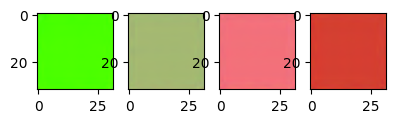

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.196


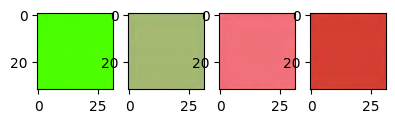

iteration 4500 avg loss: 0.0003
correct photo:


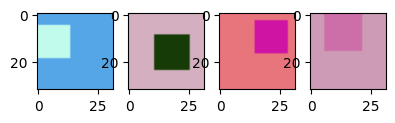

reconstructed by one token, mse: 0.1334


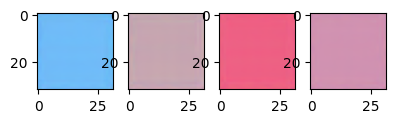

reconstructed by two tokens, mse: 0.1345


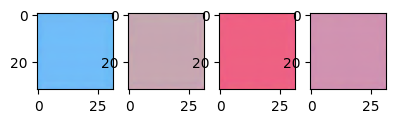

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


reconstructed by three tokens, , mse: 0.1344


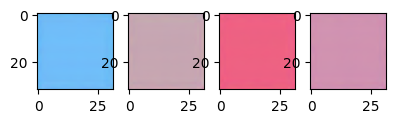

KeyboardInterrupt: 

In [11]:
l = 0
for i in range(10):
    train_dl.set_attrs(None, (l, l), (14,16))
    my_trainer.train(10000, 500, l+1)
    l = (l + 1)%3